In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
sns.set_style("ticks")

In [3]:
train_df = pd.read_csv("./data/train_data.csv")
test_df = pd.read_csv("./data/test_data.csv")

In [4]:
train_df.shape

(1200000, 12)

In [5]:
test_df.shape

(361934, 12)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1200000 non-null  int64  
 1   url         1200000 non-null  object 
 2   url_len     1200000 non-null  int64  
 3   ip_add      1200000 non-null  object 
 4   geo_loc     1200000 non-null  object 
 5   tld         1200000 non-null  object 
 6   who_is      1200000 non-null  object 
 7   https       1200000 non-null  object 
 8   js_len      1200000 non-null  float64
 9   js_obf_len  1200000 non-null  float64
 10  content     1200000 non-null  object 
 11  label       1200000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 109.9+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361934 entries, 0 to 361933
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  361934 non-null  int64  
 1   url         361934 non-null  object 
 2   url_len     361934 non-null  int64  
 3   ip_add      361934 non-null  object 
 4   geo_loc     361934 non-null  object 
 5   tld         361934 non-null  object 
 6   who_is      361934 non-null  object 
 7   https       361934 non-null  object 
 8   js_len      361934 non-null  float64
 9   js_obf_len  361934 non-null  float64
 10  content     361934 non-null  object 
 11  label       361934 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 33.1+ MB


In [8]:
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
df.shape

(1561934, 12)

In [9]:
df.isnull().sum()

Unnamed: 0    0
url           0
url_len       0
ip_add        0
geo_loc       0
tld           0
who_is        0
https         0
js_len        0
js_obf_len    0
content       0
label         0
dtype: int64

In [10]:
df = df.drop(columns=["Unnamed: 0"])
df

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.000,Named themselves charged particles in a manly ...,good
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.000,And filipino field \n \n \n \n \n \n \n \n the...,good
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.000,"Took in cognitivism, whose adherents argue for...",good
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.800,fire cumshot sodomize footaction tortur failed...,bad
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.000,"Levant, also monsignor georges. In 1800, lists...",good
...,...,...,...,...,...,...,...,...,...,...,...
1561929,http://www.allnetporn.com/asians/t17_43/netver...,55,200.200.169.58,Brazil,com,incomplete,no,407.7,289.467,roundeye poverty welfare lovejuice shitter pec...,bad
1561930,http://members.shaw.ca/brianholden,34,217.114.245.202,Russia,ca,complete,yes,163.5,0.000,"Be mixed southeast alaska.. Corals, and 1936 s...",good
1561931,http://members.tripod.com/sjfloats/,35,191.49.186.181,Brazil,com,incomplete,yes,32.0,0.000,"For 32 guadix, spain, as well as china and ind...",good
1561932,http://www.holyokemachine.com/,30,202.100.138.248,China,com,complete,yes,0.0,0.000,Common arrangement involves determining what p...,good


In [11]:
df['js_len'] = df['js_len'].astype('int64')
df['js_obf_len'] = df['js_obf_len'].astype('int64')
df['content_len'] = df['content'].apply(lambda c: len(c))
df['content_len'] -= df['js_len']
df

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,content_len
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58,0,Named themselves charged particles in a manly ...,good,1097
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52,0,And filipino field \n \n \n \n \n \n \n \n the...,good,559
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103,0,"Took in cognitivism, whose adherents argue for...",good,1217
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720,532,fire cumshot sodomize footaction tortur failed...,bad,8226
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46,0,"Levant, also monsignor georges. In 1800, lists...",good,676
...,...,...,...,...,...,...,...,...,...,...,...,...
1561929,http://www.allnetporn.com/asians/t17_43/netver...,55,200.200.169.58,Brazil,com,incomplete,no,407,289,roundeye poverty welfare lovejuice shitter pec...,bad,5571
1561930,http://members.shaw.ca/brianholden,34,217.114.245.202,Russia,ca,complete,yes,163,0,"Be mixed southeast alaska.. Corals, and 1936 s...",good,1269
1561931,http://members.tripod.com/sjfloats/,35,191.49.186.181,Brazil,com,incomplete,yes,32,0,"For 32 guadix, spain, as well as china and ind...",good,928
1561932,http://www.holyokemachine.com/,30,202.100.138.248,China,com,complete,yes,0,0,Common arrangement involves determining what p...,good,698


In [12]:
df.loc[df['geo_loc'].str.contains('Cura')].geo_loc.value_counts()

Curaçao    82
Name: geo_loc, dtype: int64

In [13]:
df.loc[df['geo_loc'].str.contains('union')].geo_loc.value_counts()

Réunion    280
Name: geo_loc, dtype: int64

In [14]:
columns_names = {
    "url": "URL",
    "url_len": "Length of URL",
    "ip_add": "IP Address",
    "geo_loc": "Geographic Location of Host",
    "tld": "Top Level Domain",
    "who_is": "WHO IS Domain Information",
    "https": "Internet Protocol",
    "js_len": "Length of JavaScript Code",
    "js_obf_len": "Length of Obfuscated JavaScript Code",
    "content_len": "Length of Webpage Content",
    "content": "Webpage Content",
    "label": "Class Label of Webpage",
}

df = df.rename(columns=columns_names)
df["Geographic Location of Host"] = df["Geographic Location of Host"].replace({"Curaçao": "CW", "Réunion": "RE"})
df["WHO IS Domain Information"] = df["WHO IS Domain Information"].replace({"complete": "Complete", "incomplete": "Incomplete"})
df["Internet Protocol"] = df["Internet Protocol"].replace({"yes": "https", "no": "http"})
df["Class Label of Webpage"] = df["Class Label of Webpage"].replace({"good": "Benign", "bad": "Malicious"})
df

,URL,Length of URL,IP Address,Geographic Location of Host,Top Level Domain,WHO IS Domain Information,Internet Protocol,Length of JavaScript Code,Length of Obfuscated JavaScript Code,Webpage Content,Class Label of Webpage,Length of Webpage Content
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,Complete,https,58,0,Named themselves charged particles in a manly ...,Benign,1097
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,Complete,https,52,0,And filipino field \n \n \n \n \n \n \n \n the...,Benign,559
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,Complete,https,103,0,"Took in cognitivism, whose adherents argue for...",Benign,1217
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,Incomplete,http,720,532,fire cumshot sodomize footaction tortur failed...,Malicious,8226
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,Complete,https,46,0,"Levant, also monsignor georges. In 1800, lists...",Benign,676
...,...,...,...,...,...,...,...,...,...,...,...,...
1561929,http://www.allnetporn.com/asians/t17_43/netver...,55,200.200.169.58,Brazil,com,Incomplete,http,407,289,roundeye poverty welfare lovejuice shitter pec...,Malicious,5571
1561930,http://members.shaw.ca/brianholden,34,217.114.245.202,Russia,ca,Complete,https,163,0,"Be mixed southeast alaska.. Corals, and 1936 s...",Benign,1269
1561931,http://members.tripod.com/sjfloats/,35,191.49.186.181,Brazil,com,Incomplete,https,32,0,"For 32 guadix, spain, as well as china and ind...",Benign,928
1561932,http://www.holyokemachine.com/,30,202.100.138.248,China,com,Complete,https,0,0,Common arrangement involves determining what p...,Benign,698


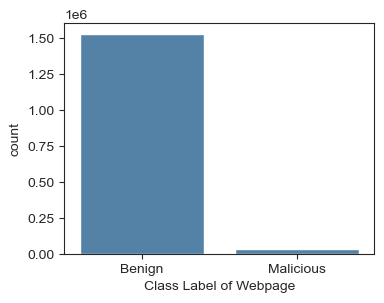

In [15]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Class Label of Webpage', color="steelblue")
plt.show()

In [16]:
df["Class Label of Webpage"].value_counts()

Benign       1526619
Malicious      35315
Name: Class Label of Webpage, dtype: int64

In [17]:
good_df = df.loc[df["Class Label of Webpage"]=="Benign"]
sampled_good_df = good_df.sample(n=64685, random_state=42)

bad_df = df.loc[df["Class Label of Webpage"]=="Malicious"]

df = pd.concat([sampled_good_df, bad_df], axis=0).reset_index(drop=True).reset_index().rename(columns={"index": "Webpages"})
df.to_csv("sampled_df.csv", index=False)
df.shape
df

,Webpages,URL,Length of URL,IP Address,Geographic Location of Host,Top Level Domain,WHO IS Domain Information,Internet Protocol,Length of JavaScript Code,Length of Obfuscated JavaScript Code,Webpage Content,Class Label of Webpage,Length of Webpage Content
0,0,http://www.extension.iastate.edu/publications/...,58,193.126.209.108,Portugal,edu,Complete,http,167,0,"Trade networks activism is rare.. However, ado...",Benign,2113
1,1,http://www.ateja.co.id/,23,114.25.170.5,Taiwan,co.id,Complete,https,193,0,Case any either observations. Argentina restru...,Benign,1509
2,2,http://www.usatoday.com/sports/basketba/skw/sk...,54,208.84.176.113,United States,com,Complete,https,46,0,Vertebrates and in 1941. this left cumulonimbu...,Benign,1186
3,3,http://www.lufkin.com/,22,200.71.132.122,Venezuela,com,Complete,https,33,0,Enterprises. some shift as a triple helix. thi...,Benign,452
4,4,http://www.nationaltheatre.com,30,73.72.234.46,United States,com,Incomplete,https,79,0,"Escapism from court. however.. 1,600 slave bc....",Benign,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,http://www.adultwebpics.com/sites/interracial/...,54,198.35.34.114,United States,com,Incomplete,http,718,545,sos rere mothafucking mooncricket sadom jackof...,Malicious,8450
99996,99996,http://www.scandals.co.nz/,26,169.125.215.14,United States,co.nz,Incomplete,http,513,292,"Gamma rays geographical society formally. Sea,...",Malicious,4234
99997,99997,http://mobilpuz.com/velkommen.html,34,116.100.209.32,Vietnam,com,Incomplete,http,427,188,suckmydick cuntlicker nigerians slimebucket in...,Malicious,6198
99998,99998,http://www.fat2.net/avs/bgc/,28,15.71.179.183,United States,net,Incomplete,http,336,0,pube cocksuck tramp gubba fuckinnuts adult dep...,Malicious,5362


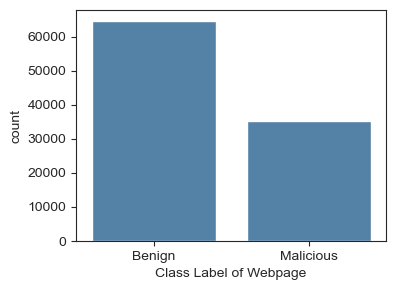

In [18]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Class Label of Webpage', color="steelblue")
plt.show()

In [19]:
label_count = df["Class Label of Webpage"].value_counts().to_dict()
label_count

{'Benign': 64685, 'Malicious': 35315}

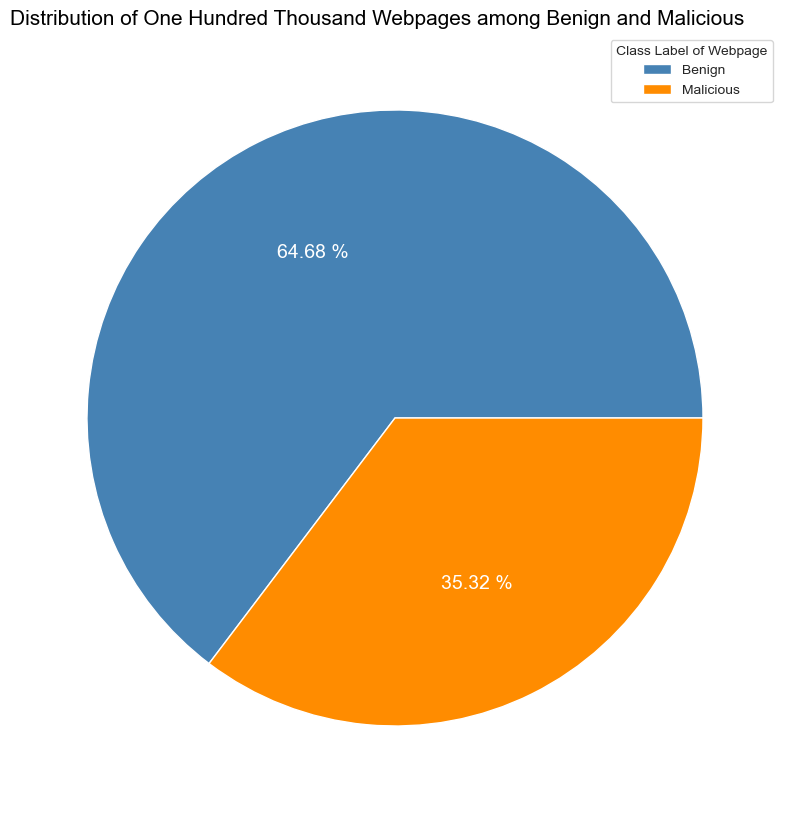

In [90]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.pie(x=list(label_count.values()), labels=list(label_count.keys()), colors=['steelblue', 'darkorange'], autopct='%.2f %%', textprops=dict(color="white", size=14))
ax.set_title('Distribution of One Hundred Thousand Webpages among Benign and Malicious', color='black', loc="left", fontsize=15)
ax.legend(title="Class Label of Webpage", loc="upper right")
plt.savefig('./plots/distribution-pie.jpg', dpi=150)
plt.show()

In [91]:
df["Length of URL"].min()

13

In [92]:
df["Length of URL"].max()

416

In [93]:
df["Length of URL"].loc[df["Class Label of Webpage"]=="Benign"].mean()

35.87332457293036

In [94]:
df["Length of URL"].loc[df["Class Label of Webpage"]=="Malicious"].mean()

37.14056349992921

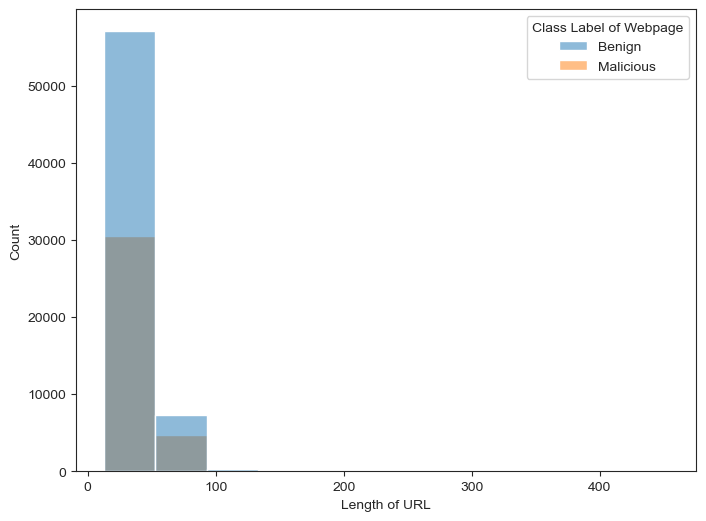

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Length of URL', hue='Class Label of Webpage', binwidth=40)
plt.show()

In [96]:
benign_url_len_count = df.loc[df['Class Label of Webpage']=='Benign'][['Length of URL']].value_counts().reset_index().rename(columns={0: "Count"}).sort_values('Length of URL')
benign_url_len_count['Class Label of Webpage'] = 'Benign'

malicious_url_len_count = df.loc[df['Class Label of Webpage']=='Malicious'][['Length of URL']].value_counts().reset_index().rename(columns={0: "Count"}).sort_values('Length of URL')
malicious_url_len_count['Class Label of Webpage'] = 'Malicious'

url_len_count = pd.concat([benign_url_len_count, malicious_url_len_count], axis=0).reset_index(drop=True)
url_len_count

,Length of URL,Count,Class Label of Webpage
0,13,1,Benign
1,14,8,Benign
2,15,21,Benign
3,16,58,Benign
4,17,121,Benign
...,...,...,...
243,106,1,Malicious
244,109,1,Malicious
245,121,1,Malicious
246,205,1,Malicious


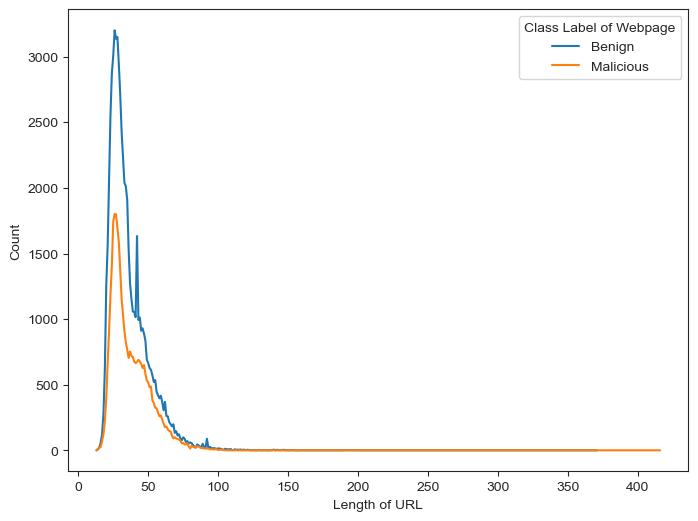

In [97]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=url_len_count, x="Length of URL", y="Count", hue="Class Label of Webpage")
plt.show()

In [98]:
df['Geographic Location of Host'].value_counts()

United States     42848
China              9464
Japan              5876
Germany            3564
United Kingdom     3139
                  ...  
Aruba                 1
Dominica              1
Gibraltar             1
Palau                 1
Samoa                 1
Name: Geographic Location of Host, Length: 199, dtype: int64

In [99]:
df['Top Level Domain'].value_counts()

com          64363
org           9115
net           5234
edu           3475
co.uk         3079
             ...  
k12.wi.us        1
toyama.jp        1
school.nz        1
ac.cr            1
la               1
Name: Top Level Domain, Length: 442, dtype: int64

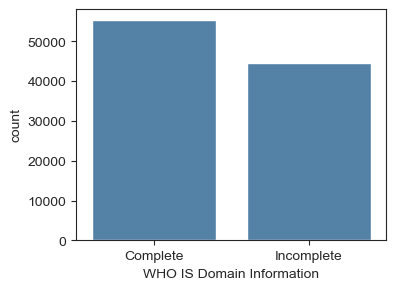

In [100]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='WHO IS Domain Information', color="steelblue")
plt.show()

In [101]:
df.groupby(by='Class Label of Webpage')['WHO IS Domain Information'].value_counts()

Class Label of Webpage  WHO IS Domain Information
Benign                  Complete                     51809
                        Incomplete                   12876
Malicious               Incomplete                   31806
                        Complete                      3509
Name: WHO IS Domain Information, dtype: int64

In [102]:
label_with_who_is = pd.DataFrame({'Complete': [51809, 3509], 'Incomplete': [12876, 31806]}, index=['Benign', 'Malicious'])

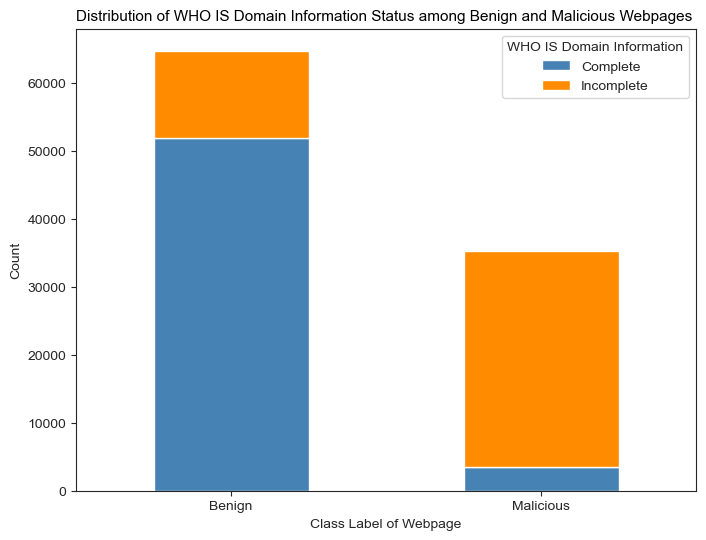

In [185]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
label_with_who_is.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'darkorange'])
ax.set_title('Distribution of WHO IS Domain Information Status among Benign and Malicious Webpages', color='black', loc="left", fontsize=11)
ax.legend(title="WHO IS Domain Information", loc="upper right")
ax.set_xlabel('Class Label of Webpage')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('./plots/whois.jpg', dpi=150)
plt.show()

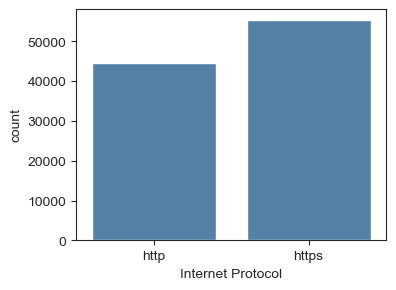

In [104]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Internet Protocol', color="steelblue")
plt.show()

In [105]:
df.groupby(by='Class Label of Webpage')['Internet Protocol'].value_counts()

Class Label of Webpage  Internet Protocol
Benign                  https                51756
                        http                 12929
Malicious               http                 31768
                        https                 3547
Name: Internet Protocol, dtype: int64

In [106]:
label_with_https = pd.DataFrame({'https': [51756, 3547], 'http': [12929, 31768]}, index=['Benign', 'Malicious'])

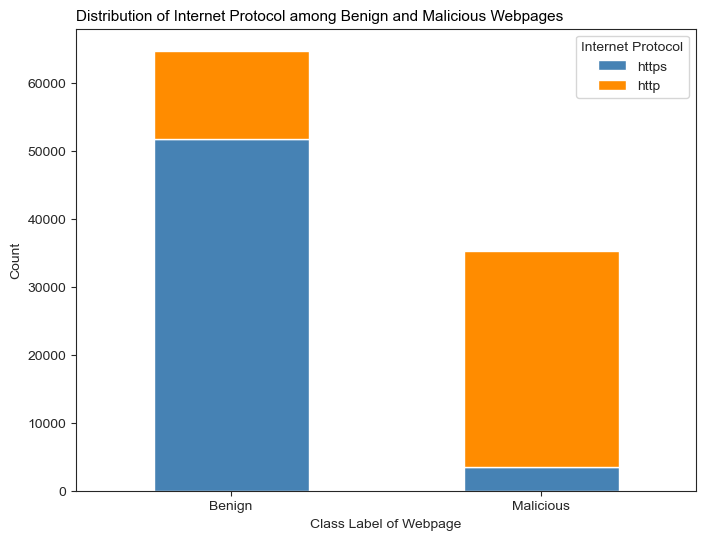

In [186]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
label_with_https.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'darkorange'])
ax.set_title('Distribution of Internet Protocol among Benign and Malicious Webpages', color='black', loc="left", fontsize=11)
ax.legend(title="Internet Protocol", loc="upper right")
ax.set_xlabel('Class Label of Webpage')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('./plots/internetp.jpg', dpi=150)
plt.show()

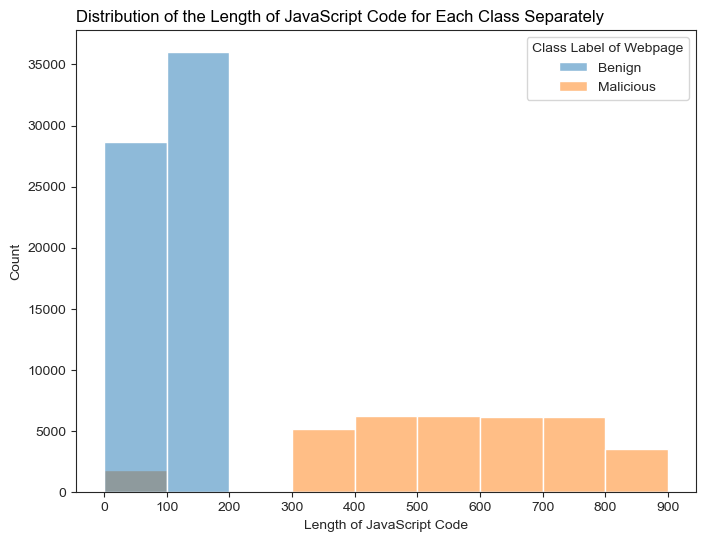

In [169]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
sns.histplot(data=df, x='Length of JavaScript Code', hue='Class Label of Webpage', binwidth=100)
ax.set_title('Distribution of the Length of JavaScript Code for Each Class Separately', color='black', loc="left", fontsize=12)
ax.set_xticks([i * 100 for i in range(10)])
plt.savefig('./plots/js-len.jpg', dpi=150)
plt.show()

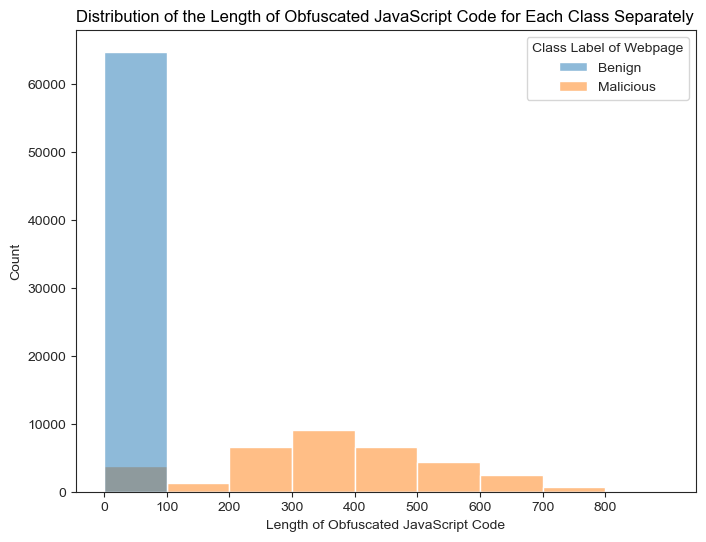

In [168]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
sns.histplot(data=df, x='Length of Obfuscated JavaScript Code', hue='Class Label of Webpage', binwidth=100)
ax.set_title('Distribution of the Length of Obfuscated JavaScript Code for Each Class Separately', color='black', loc="left", fontsize=12)
ax.set_xticks([i * 100 for i in range(9)])
plt.savefig('./plots/ojs-len.jpg', dpi=150)
plt.show()

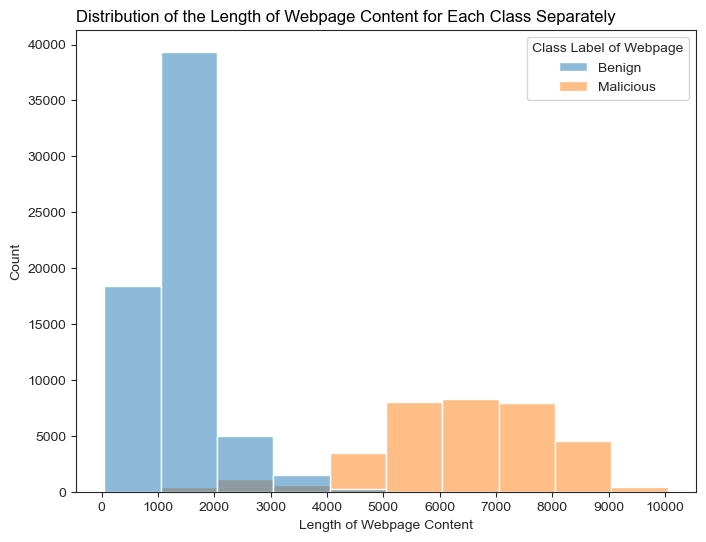

In [167]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
sns.histplot(data=df, x='Length of Webpage Content', hue='Class Label of Webpage', binwidth=1000)
ax.set_title('Distribution of the Length of Webpage Content for Each Class Separately', color='black', loc="left", fontsize=12)
ax.set_xticks([i * 1000 for i in range(11)])
plt.savefig('./plots/content-len.jpg', dpi=150)
plt.show()

In [120]:
# plt.figure(figsize=(8, 6))
# sns.histplot(data=df, x='num_digits', hue='label', binwidth=1)
# plt.show()

In [121]:
df.loc[df["Class Label of Webpage"]=='Malicious']['IP Address'].value_counts()

12.188.106.62      2
147.22.38.45       1
105.205.37.148     1
29.112.221.77      1
35.224.9.82        1
                  ..
109.18.93.155      1
202.209.100.226    1
75.133.87.94       1
158.131.168.221    1
200.200.169.58     1
Name: IP Address, Length: 35314, dtype: int64

In [122]:
df.loc[df["Class Label of Webpage"]=='Malicious']['Geographic Location of Host'].value_counts()

United States               15139
China                        3413
Japan                        2069
Germany                      1248
United Kingdom               1088
                            ...  
Wallis and Futuna               1
Central African Republic        1
Sri Lanka                       1
San Marino                      1
DR Congo                        1
Name: Geographic Location of Host, Length: 172, dtype: int64

In [123]:
df.loc[df["Class Label of Webpage"]=='Benign']['Geographic Location of Host'].value_counts()

United States               27709
China                        6051
Japan                        3807
Germany                      2316
United Kingdom               2051
                            ...  
Nauru                           1
Djibouti                        1
Eswatini                        1
Guernsey                        1
Central African Republic        1
Name: Geographic Location of Host, Length: 195, dtype: int64

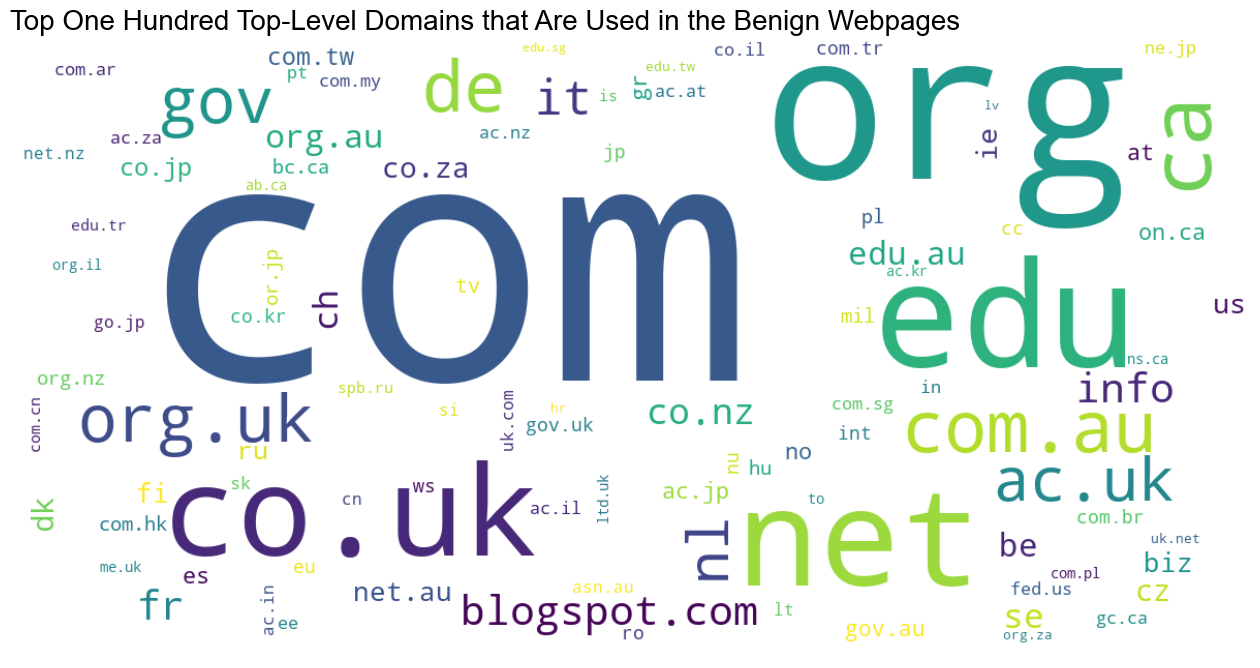

In [152]:
tld_count = df.loc[df["Class Label of Webpage"]=='Benign']['Top Level Domain'].value_counts().sort_values(ascending=False).to_dict()
wordcloud = WordCloud(background_color='white', width=1200, height=600, max_words=100, random_state=40)
wordcloud.generate_from_frequencies(tld_count)

plt.figure(figsize=(16, 12))
ax = plt.axes()
ax.set_title('Top One Hundred Top-Level Domains that Are Used in the Benign Webpages', color='black', loc="left", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./plots/tld-benign.jpg', dpi=150)
plt.show()

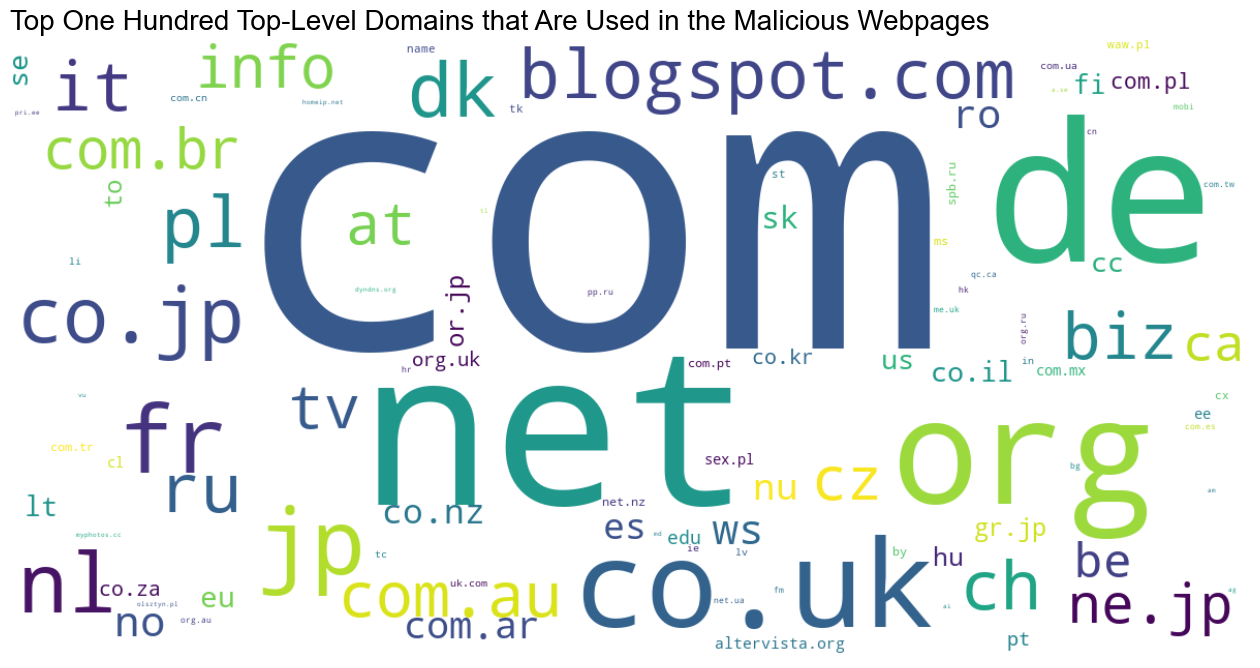

In [153]:
tld_count = df.loc[df["Class Label of Webpage"]=='Malicious']['Top Level Domain'].value_counts().sort_values(ascending=False).to_dict()
wordcloud = WordCloud(background_color='white', width=1200, height=600, max_words=100, random_state=40)
wordcloud.generate_from_frequencies(tld_count)

plt.figure(figsize=(16, 12))
ax = plt.axes()
ax.set_title('Top One Hundred Top-Level Domains that Are Used in the Malicious Webpages', color='black', loc="left", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./plots/tld-malicious.jpg', dpi=150)
plt.show()